In [1]:
%pylab inline
from pandas import Series, DataFrame
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# the `Series` class
grades1 = Series([76, 82, 78, 100],
                 index=['alex', 'robert', 'minnie', 'alice'],
                 name='assignment1', dtype=float64)
grades1

alex       76
robert     82
minnie     78
alice     100
Name: assignment1, dtype: float64

In [3]:
for student in grades1.keys():
    print '{} got {} points in {}'.format(student, grades1[student], grades1.name)

alex got 76.0 points in assignment1
robert got 82.0 points in assignment1
minnie got 78.0 points in assignment1
alice got 100.0 points in assignment1


In [4]:
grades1a = grades1.append(Series([79, 81], index=['theo', 'joe']))
grades1a

alex       76
robert     82
minnie     78
alice     100
theo       79
joe        81
dtype: float64

In [5]:
grades2 = Series([87, 76, 76, 94, 88],
                 index=['alex', 'lucy', 'robert', 'minnie', 'alice'],
                 dtype=float64)
grades2

alex      87
lucy      76
robert    76
minnie    94
alice     88
dtype: float64

In [6]:
average = 0.5 * (grades1 + grades2)
average

alex      81.5
alice     94.0
lucy       NaN
minnie    86.0
robert    79.0
dtype: float64

In [7]:
average.isnull()

alex      False
alice     False
lucy       True
minnie    False
robert    False
dtype: bool

In [8]:
average.dropna()

alex      81.5
alice     94.0
minnie    86.0
robert    79.0
dtype: float64

In [9]:
grades1.sort()
grades1

alex       76
minnie     78
robert     82
alice     100
Name: assignment1, dtype: float64

In [10]:
grades1.sort_index()

alex       76
alice     100
minnie     78
robert     82
Name: assignment1, dtype: float64

In [11]:
temps = Series([71, 76, 69, 67, 74, 80, 82, 70, 66, 80],
               index=range(6, 16),
               name='temperatures', dtype=float64)
temps

6     71
7     76
8     69
9     67
10    74
11    80
12    82
13    70
14    66
15    80
Name: temperatures, dtype: float64

In [12]:
temps.describe()

count    10.000000
mean     73.500000
std       5.778312
min      66.000000
25%      69.250000
50%      72.500000
75%      79.000000
max      82.000000
Name: temperatures, dtype: float64

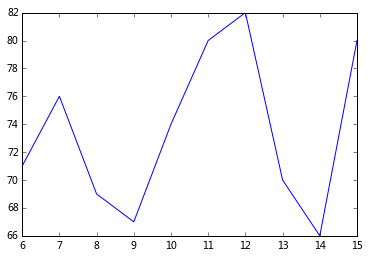

In [13]:
temps.plot()

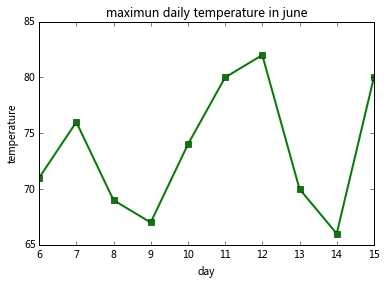

In [14]:
temps.plot(style='-s', lw=2, color='green')
axis((6, 15, 65, 85))
xlabel('day')
ylabel('temperature')
title('maximun daily temperature in june');

In [15]:
temps[temps > 75]

7     76
11    80
12    82
15    80
Name: temperatures, dtype: float64

In [16]:
# the `DataFrame` class
grades = DataFrame(
[['alice', 80., 92., 84.],
 ['bob', 78., NaN, 86.],
 ['samaly', 75., 78., 88.]],
index=[17005, 17035, 17028],
columns=['name', 'test1', 'test2', 'final'])
grades

,name,test1,test2,final
17005,alice,80,92,84
17035,bob,78,NaN,86
17028,samaly,75,78,88


In [17]:
idx = pd.Index(["1st row", "2ed row"])
col1 = Series([1, 2], index=idx)
col2 = Series([3, 4], index=idx)
data = {"column1": col1, "column2": col2}
df = DataFrame(data)
df

,column1,column2
1st row,1,3
2ed row,2,4


In [18]:
# `loc`  is label-based
# `iloc` is integer-based
# `ix`   supports mixed integer and label-based access
grades.loc[17035, 'test2'] = 98
grades.loc[:, 'score'] = 0.25 * (grades['test1'] + grades['test2'] + 2 * grades['final'])
grades

,name,test1,test2,final,score
17005,alice,80,92,84,85.00
17035,bob,78,98,86,87.00
17028,samaly,75,78,88,82.25


In [19]:
grades.insert(4, 'extra credit', [2., 6., 10.])
grades

,name,test1,test2,final,extra credit,score
17005,alice,80,92,84,2,85.00
17035,bob,78,98,86,6,87.00
17028,samaly,75,78,88,10,82.25


In [20]:
grades.loc[17011,:] = ['george', 92, 88, 91, 9, NaN]
grades

,name,test1,test2,final,extra credit,score
17005,alice,80,92,84,2,85.00
17035,bob,78,98,86,6,87.00
17028,samaly,75,78,88,10,82.25
17011,george,92,88,91,9,NaN


In [21]:
grades.loc[:, 'score'] = 0.25 * (grades['test1'] + grades['test2'] + 2 * grades['final'] + grades['extra credit'])
grades

,name,test1,test2,final,extra credit,score
17005,alice,80,92,84,2,85.50
17035,bob,78,98,86,6,88.50
17028,samaly,75,78,88,10,84.75
17011,george,92,88,91,9,92.75


In [22]:
grades[(80 <= grades['score']) & grades['score'] < 90].loc[:, ['name', 'score']]

,name,score
17005,alice,85.50
17035,bob,88.50
17028,samaly,84.75
17011,george,92.75
